In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams

In [5]:
# Read in titanic dataset
df = pd.read_excel("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


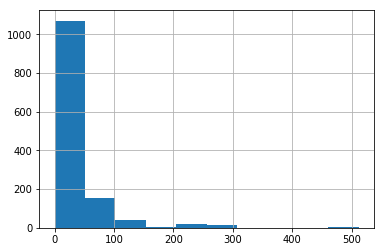

In [3]:
# Methods that you can call on a series
# Histogram
df.fare.hist()

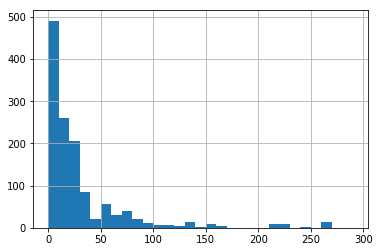

In [4]:
# Can add arguments to hist, i.e. custom bin sizes
# Range(start,end,iteration)
df.fare.hist(bins=range(0,300,10))

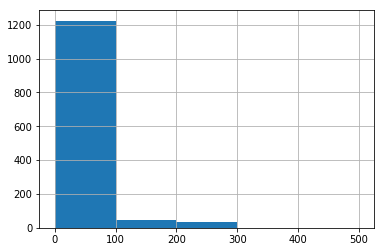

In [6]:
# Histogram of fare spending where buckets are $100 increments to 500
df.fare.hist(bins=range(0,501,100))

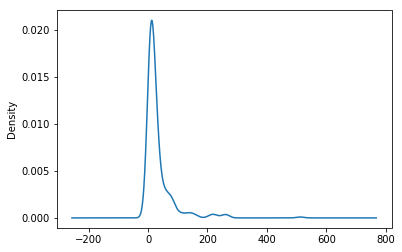

In [8]:
# KDE - Kernel density estimate. Basically a continuous histogram
df.fare.plot(kind='kde')

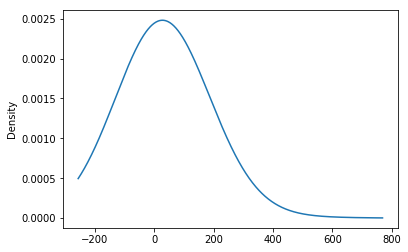

In [11]:
# KDE bandwidth method (default bw is .25)
df.fare.plot(kind='kde', bw_method=3)

Text(0.5,0,u'Fare Price ($)')

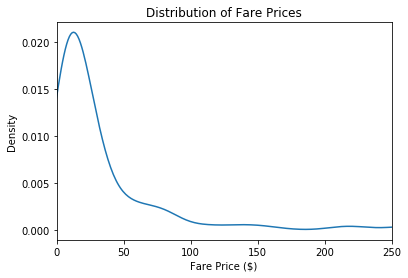

In [16]:
# Setting Axis limits & Labels
# Notice that above, we have negative fares because the KDE does it by default

df.fare.plot(kind='kde')

ax = plt.gca()

ax.set_xlim(0, 250)
# setting titles
ax.set_title('Distribution of Fare Prices')
ax.set_xlabel('Fare Price ($)')

In [1]:
# Chaining plotting w other pandas methods
# Note, with groupby, labels will be by value in pclass
df.groupby('pclass')['fare'].plot(kind='hist', legend=True)

ax = plt.gca()

ax.set_xlim(0,500)
ax.set_title('Distribution of Fare Prices by Class')

NameError: name 'df' is not defined

In [20]:
# Pie Charts
# Useful for showing a part-to-whole relationship
# Must pass in value counts
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

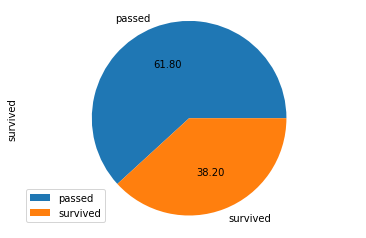

In [8]:
# Autopct - adds the percentage in (in this case to 2 decimal points)
df.survived.value_counts().plot(kind='pie',legend=True, 
                                labels=['passed','survived'], 
                                autopct='%.2f')

ax = plt.gca()

# This forces chart to be symmetric
_ = ax.axis('equal')

In [ ]:
# Barcharts


In [28]:
# Changes size of chart - first num is width, 2nd num is height
rcParams['figure.figsize'] = (15,5)

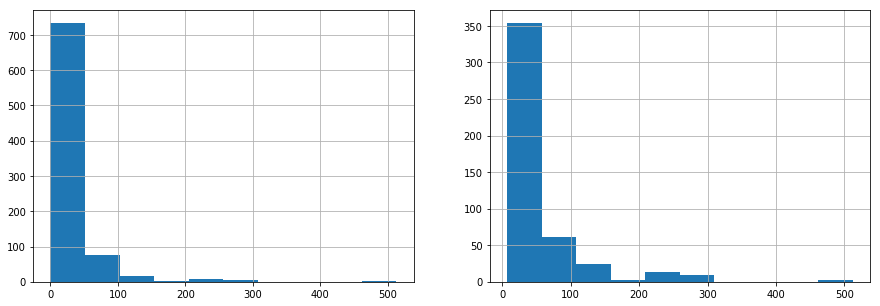

In [29]:
# Multiple Axes in a single figure
# numbers here are subplots(# rows, # columns)
fig, axs = plt.subplots(1,2)

df[df.sex=='male']['fare'].hist(ax=axs[0], label="Male")
df[df.sex=='female']['fare'].hist(ax=axs[1], label='Female')

In [ ]:
# Can do scatter plots with .scatter